#UNIVERSIDAD GALILEO
##Ciencia de Datos en Python
### Ana Lucia Mendizabal Polanco


##Import de librerias 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
##Carga de fuente de datos .npy

In [3]:
dataSet= np.load('proyecto_training_data.npy')

In [13]:
dataSet= pd.DataFrame(dataSet)
dataSet

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [ ]:
##Asignación de nombres a las columnas del dataSet

In [14]:
dataSet= pd.DataFrame(dataSet)
dataSet.columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
dataSet
#dataSet.query('SalePrice==@Max')

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


##Segmentación de datos 80 entrenamiento y 20 validación 

In [16]:
entrenamiento = 0.80
dataSet['is_train'] = np.random.uniform(0, 1, len(dataSet)) <= entrenamiento
entrenamiento, validacion = dataSet[dataSet['is_train']==True], dataSet[dataSet['is_train']==False]
dataSet = dataSet.drop('is_train', 1)
print ("Entrenamiento",len(entrenamiento))
print("Validacion",len(validacion))
print(entrenamiento)

Entrenamiento 1158
Validacion 302
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage  \
0      208500.0          7.0     856.0           8.0     2003.0         65.0   
1      181500.0          6.0    1262.0           6.0     1976.0         80.0   
2      223500.0          7.0     920.0           6.0     2001.0         68.0   
3      140000.0          7.0     961.0           7.0     1915.0         60.0   
4      250000.0          8.0    1145.0           9.0     2000.0         84.0   
...         ...          ...       ...           ...        ...          ...   
1454   185000.0          7.0    1221.0           6.0     2004.0         62.0   
1455   175000.0          6.0     953.0           7.0     1999.0         62.0   
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0   
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0   
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0   

     

C:\Users\analu\AppData\Local\Temp\ipykernel_24216\1701262009.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataSet = dataSet.drop('is_train', 1)


#Validación de la asignación de nombres a las columnas 

In [10]:
entrenamiento

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,is_train
0,208500.0,7.0,856.0,8.0,2003.0,65.0,True
2,223500.0,7.0,920.0,6.0,2001.0,68.0,True
3,140000.0,7.0,961.0,7.0,1915.0,60.0,True
4,250000.0,8.0,1145.0,9.0,2000.0,84.0,True
5,143000.0,5.0,796.0,5.0,1993.0,85.0,True
...,...,...,...,...,...,...,...
1454,185000.0,7.0,1221.0,6.0,2004.0,62.0,True
1455,175000.0,6.0,953.0,7.0,1999.0,62.0,True
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0,True
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0,True


##Generar media por variables sobre el 80(entrenamiento)

In [27]:
#MEDIA POR VARIABLES
mediaS=np.median(entrenamiento['SalePrice'])
mediaO=np.median(entrenamiento['OverallQual'])
media1=np.median(entrenamiento['1stFlrSF'])
mediaT=np.median(entrenamiento['TotRmsAbvGrd'])
mediaY=np.median(entrenamiento['YearBuilt'])
mediaL=np.median(entrenamiento['LotFrontage'])
#muestra resultado de media
    #print('Media_SalePrice       ',str(mediaS))
    #print('Media_OverallQual     ', str(mediaO))
    #print('Media_1stFlrSF        ', str(media1))
    #print('Media_TotRmsAbvGrd    ', str(mediaT))
    #print('Media_YearBuilt       ', str(mediaY))
    #print('Media_LotFrontage     ', str(mediaL))

In [12]:
mediaS=np.median(entrenamiento['SalePrice'])
mediaS

163000.0

In [13]:
mediaO=np.median(entrenamiento['OverallQual'])
mediaO

6.0

In [14]:
media1=np.median(entrenamiento['1stFlrSF'])
media1

1088.5

In [15]:
mediaT=np.median(entrenamiento['TotRmsAbvGrd'])
mediaT

6.0

In [16]:
mediaY=np.median(entrenamiento['YearBuilt'])
mediaY

1972.0

In [17]:
mediaL=np.median(entrenamiento['LotFrontage'])
mediaL

nan

##Cálculo de Máximos por variables sobre el 80 (entrenamiento)

In [7]:
#VALORES MAXIMOS POR VARIABLES
MaxS=np.max(entrenamiento['SalePrice'])
MaxO=np.max(entrenamiento['OverallQual'])
Max1=np.max(entrenamiento['1stFlrSF'])
MaxT=np.max(entrenamiento['TotRmsAbvGrd'])
MaxY=np.max(entrenamiento['YearBuilt'])
MaxL=np.max(entrenamiento['LotFrontage'])
#muestra resultado de max
    #print('Max_SalePrice       ',str(MaxS))
    #print('Max_OverallQual     ', str(MaxO))
    #print('Max_1stFlrSF        ', str(Max1))
    #print('Max_TotRmsAbvGrd    ', str(MaxT))
    #print('Max_YearBuilt       ', str(MaxY))
    #print('Max_LotFrontage     ', str(MaxL))

In [18]:
MaxS=np.max(entrenamiento['SalePrice'])
MaxS

755000.0

In [19]:
MaxO=np.max(entrenamiento['OverallQual'])
MaxO

10.0

In [19]:
Max1=np.max(entrenamiento['1stFlrSF'])
Max1

4692.0

In [20]:
MaxT=np.max(entrenamiento['TotRmsAbvGrd'])
MaxT

14.0

In [21]:
MaxY=np.max(entrenamiento['YearBuilt'])
MaxY

2010.0

In [22]:
MaxL=np.max(entrenamiento['LotFrontage'])
MaxL

313.0

##Generar Mínimos por variables sobre el 80(entrenamiento)

In [28]:
#VALORES MINIMOS POR VARIABLES
MinS=np.min(entrenamiento['SalePrice'])
MinO=np.min(entrenamiento['OverallQual'])
Min1=np.min(entrenamiento['1stFlrSF'])
MinT=np.min(entrenamiento['TotRmsAbvGrd'])
MinY=np.min(entrenamiento['YearBuilt'])
MinL=np.min(entrenamiento['LotFrontage'])
#muestra valores min
    #print('Min_SalePrice       ',str(MinS))
    #print('Min_OverallQual     ', str(MinO))
    #print('Min_1stFlrSF        ', str(Min1))
    #print('Min_TotRmsAbvGrd    ', str(MinT))
    #print('Min_YearBuilt       ', str(MinY))
    #print('Min_LotFrontage     ', str(MinL))

In [20]:
MinS=np.min(entrenamiento['SalePrice'])
MinS

35311.0

##RANGOS POR VARIABLE PEAK TO PEAK 80 (entrenamiento)

In [29]:
#RANGOS POR VARIABLE PEAK TO PEAK
ptpS=np.ptp(entrenamiento['SalePrice'])
ptpO=np.ptp(entrenamiento['OverallQual'])
ptp1=np.ptp(entrenamiento['1stFlrSF'])
ptpT=np.ptp(entrenamiento['TotRmsAbvGrd'])
ptpY=np.ptp(entrenamiento['YearBuilt'])
ptpL=np.ptp(entrenamiento['LotFrontage'])
#muestra valores peak to peak
    #print('Ptp_SalePrice       ',str(ptpS))
    #print('Ptp_OverallQual     ', str(ptpO))
    #print('Ptp_1stFlrSF        ', str(ptp1))
    #print('Ptp_TotRmsAbvGrd    ', str(ptpT))
    #print('Ptp_YearBuilt       ', str(ptpY))
    #print('Ptp_LotFrontage     ', str(ptpL))

In [21]:
ptpS=np.ptp(entrenamiento['SalePrice'])
ptpS

719689.0

#DESVIACION ESTANDAR POR VARIABLE 80 (entrenamiento)

In [30]:
#DESVIACION ESTANDAR POR VARIABLE
stdS=np.std(entrenamiento['SalePrice'])
stdO=np.std(entrenamiento['OverallQual'])
std1=np.std(entrenamiento['1stFlrSF'])
stdT=np.std(entrenamiento['TotRmsAbvGrd'])
stdY=np.std(entrenamiento['YearBuilt'])
stdL=np.std(entrenamiento['LotFrontage'])
#muestra valores desviación estandar
    #print('std_SalePrice       ',str(stdS))
    #print('std_OverallQual     ', str(stdO))
    #print('std_1stFlrSF        ', str(std1))
    #print('std_TotRmsAbvGrd    ', str(stdT))
    #print('std_YearBuilt       ', str(stdY))
    #print('std_LotFrontage     ', str(stdL))

##Graficas Seaborn por variable del 80 (entrenamiento)

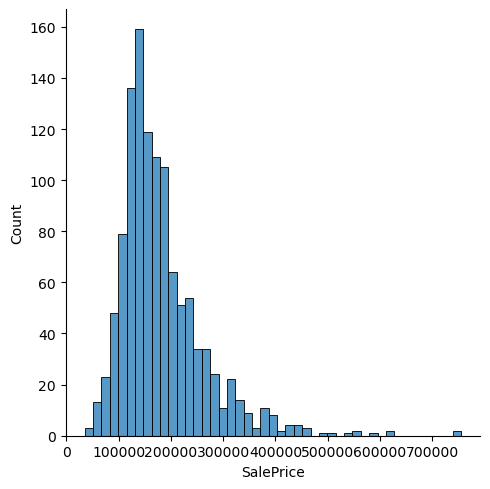

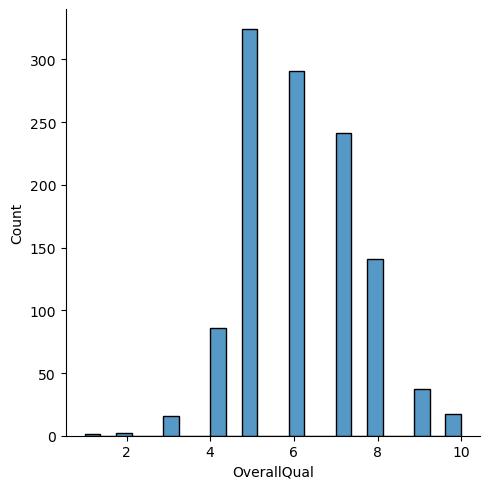

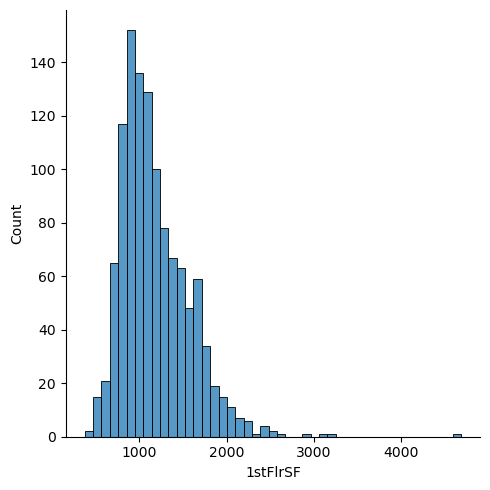

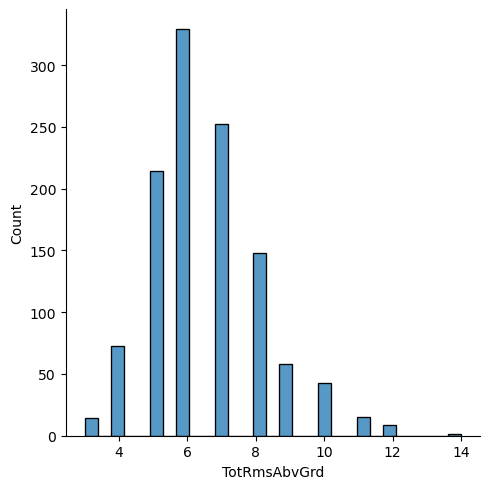

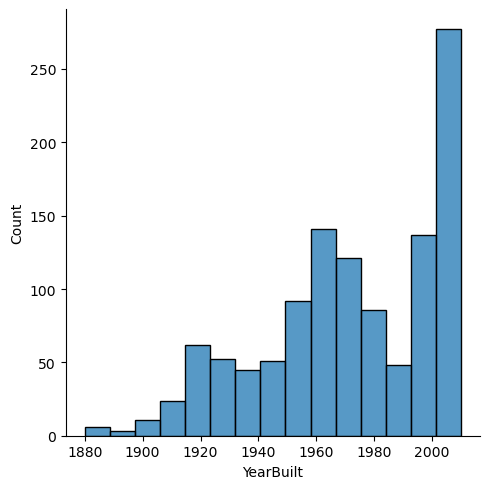

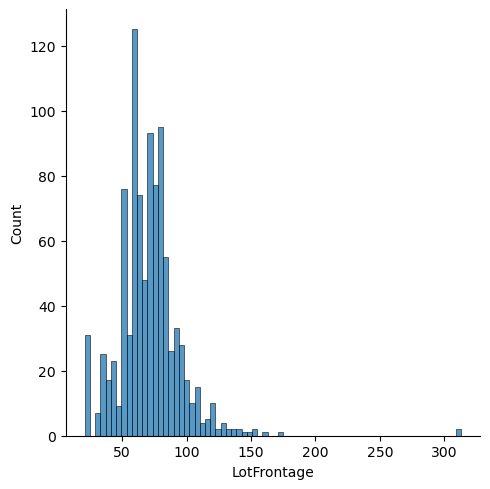

In [22]:
#Graficas Seaborn
#SalePrice
sns.displot(entrenamiento['SalePrice'])
sns.displot(entrenamiento['OverallQual'])
sns.displot(entrenamiento['1stFlrSF'])
sns.displot(entrenamiento['TotRmsAbvGrd'])
sns.displot(entrenamiento['YearBuilt'])
sns.displot(entrenamiento['LotFrontage'])

##CORRELACION DE VARIABLES X  (x variable dependiente= SalePrice) 

In [31]:
corre= pd.DataFrame(entrenamiento)
cols=[0,1,2,3,4,5]
correl= corre[corre.columns[cols]]
correl.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.798001,0.595651,0.546148,0.542370,0.322137
OverallQual,0.798001,1.000000,0.470168,0.426597,0.585634,0.227069
1stFlrSF,0.595651,0.470168,1.000000,0.401245,0.293400,0.454458
TotRmsAbvGrd,0.546148,0.426597,0.401245,1.000000,0.111510,0.342889
YearBuilt,0.542370,0.585634,0.293400,0.111510,1.000000,0.107245
LotFrontage,0.322137,0.227069,0.454458,0.342889,0.107245,1.000000


In [ ]:
#GRAFICA DE CORRELACION POR VARIABLE 

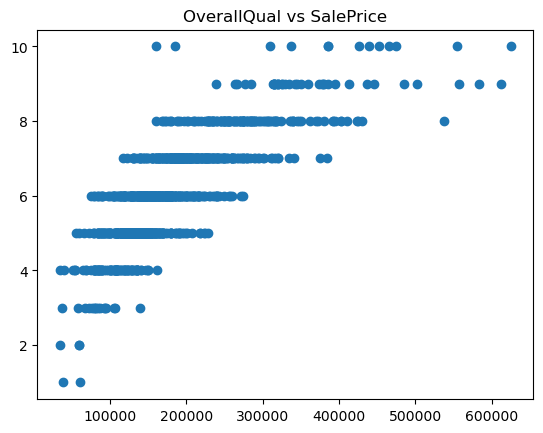

In [11]:
#CORRELACION DE VARIABLES X
#Se excluye la variable Y 
#corre= pd.DataFrame(entrenamiento)
#cols=[1,2,3,4,5]
#correl= corre[corre.columns[cols]]
#correl.corr()

#CORRELACION DE VARIABLES 
corre= pd.DataFrame(entrenamiento)
cols=[0,1,2,3,4,5]
correl= corre[corre.columns[cols]]
correl.corr()


#GRAFICA DE CORRELACION
plt.scatter(correl['SalePrice'],correl['OverallQual'])
plt.title('OverallQual vs SalePrice')
plt.show()

In [13]:
corre= pd.DataFrame(entrenamiento)
cols=[0,1,2,3,4,5,6]
correl= corre[corre.columns[cols]]
correl.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,is_train
SalePrice,1.000000,0.798001,0.595651,0.546148,0.542370,0.322137,NaN
OverallQual,0.798001,1.000000,0.470168,0.426597,0.585634,0.227069,NaN
1stFlrSF,0.595651,0.470168,1.000000,0.401245,0.293400,0.454458,NaN
TotRmsAbvGrd,0.546148,0.426597,0.401245,1.000000,0.111510,0.342889,NaN
YearBuilt,0.542370,0.585634,0.293400,0.111510,1.000000,0.107245,NaN
LotFrontage,0.322137,0.227069,0.454458,0.342889,0.107245,1.000000,NaN
is_train,NaN,NaN,NaN,NaN,NaN,NaN,NaN


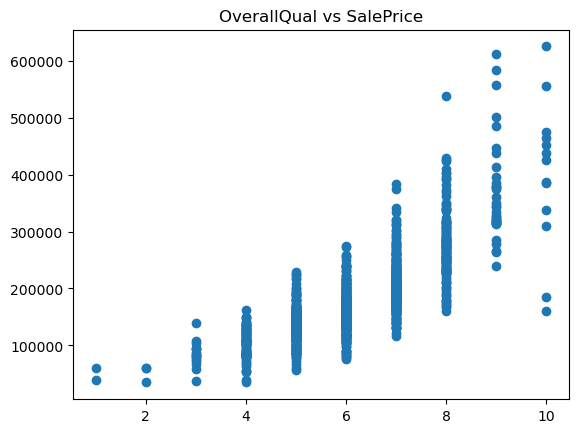

In [14]:
plt.scatter(correl['OverallQual'],correl['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.show()

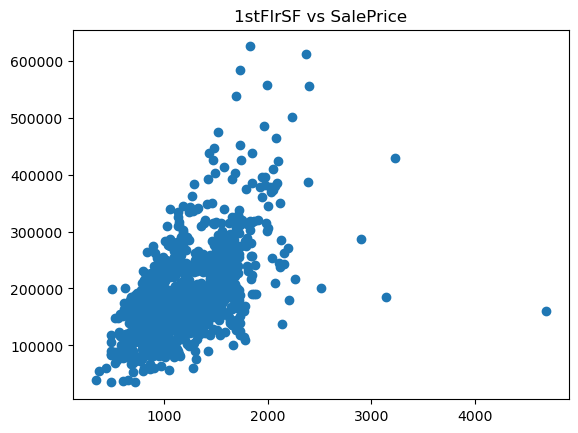

In [15]:
plt.scatter(correl['1stFlrSF'],correl['SalePrice'])
plt.title('1stFlrSF vs SalePrice')
plt.show()

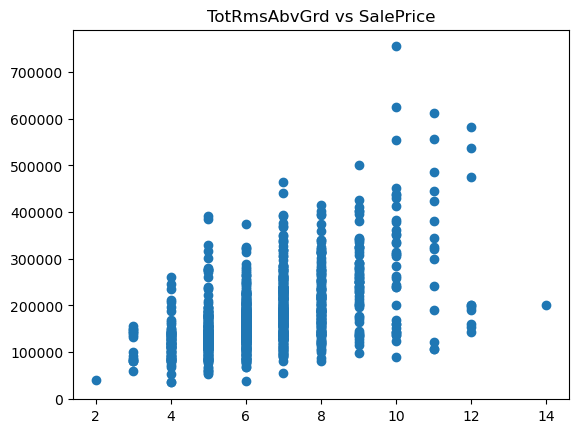

In [58]:
plt.scatter(correl['TotRmsAbvGrd'],correl['SalePrice'])
plt.title('TotRmsAbvGrd vs SalePrice')
plt.show()

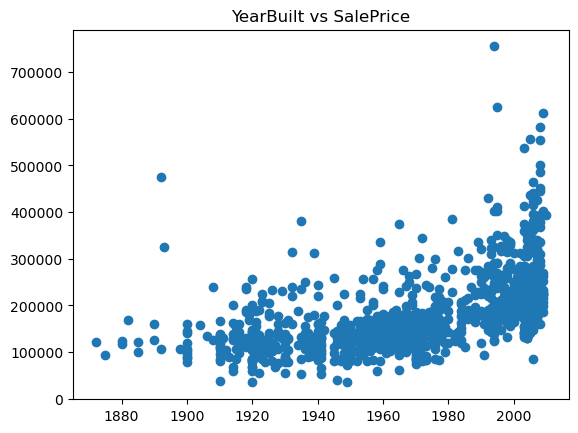

In [57]:
plt.scatter(correl['YearBuilt'],correl['SalePrice'])
plt.title('YearBuilt vs SalePrice')
plt.show()

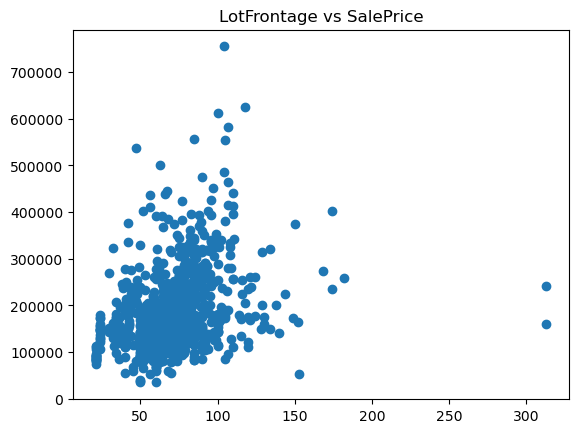

In [122]:
plt.scatter(correl['LotFrontage'],correl['SalePrice'])
plt.title('LotFrontage vs SalePrice')
plt.show()

In [ ]:
##Limpieza de datos: Nulos(NAN) serán 0

In [17]:
validacion2 = validacion.fillna(0)
validacion2

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,is_train
5,143000.0,5.0,796.0,5.0,1993.0,85.0,False
6,307000.0,8.0,1694.0,7.0,2004.0,75.0,False
16,149000.0,6.0,1004.0,5.0,1970.0,0.0,False
21,139400.0,7.0,1108.0,6.0,1930.0,57.0,False
23,129900.0,5.0,1060.0,6.0,1976.0,44.0,False
...,...,...,...,...,...,...,...
1436,120500.0,4.0,864.0,5.0,1971.0,60.0,False
1450,136000.0,5.0,896.0,8.0,1974.0,60.0,False
1452,145000.0,5.0,1072.0,5.0,2005.0,35.0,False
1453,84500.0,5.0,1140.0,6.0,2006.0,90.0,False


##Variables con potencial predictivo 1stFlrSF y YearBuilt- Graficas

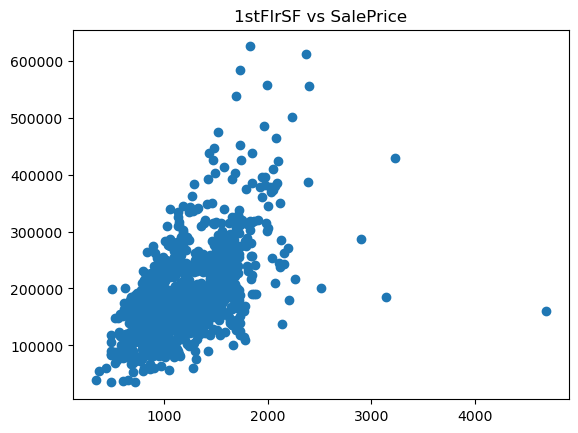

In [32]:
#Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlaci´on entre dicha variable y la variable dependiente.
plt.scatter(correl['1stFlrSF'],correl['SalePrice'])
plt.title('1stFlrSF vs SalePrice')
plt.show()

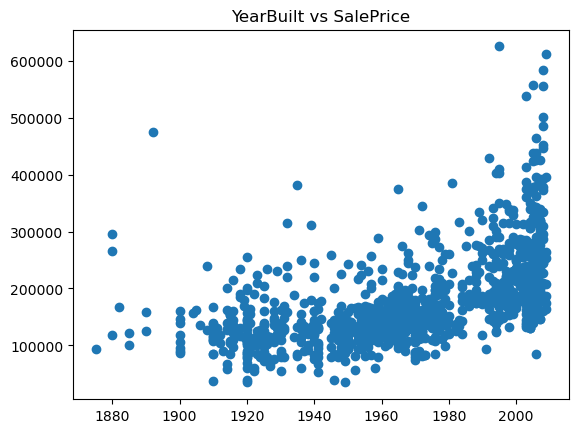

In [33]:
plt.scatter(correl['YearBuilt'],correl['SalePrice'])
plt.title('YearBuilt vs SalePrice')
plt.show()

In [ ]:
##Pasos 6 y 7  
"""FUNCION REGRESION MANUAL"""

Iteración: 0 Error: 20868523642.49669


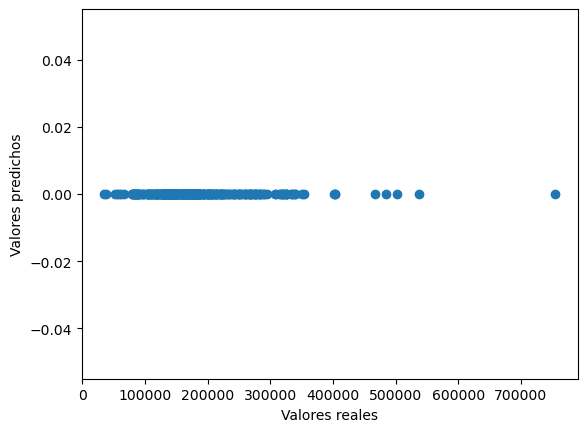

Iteración: 1 Error: 6.499813699304781e+18


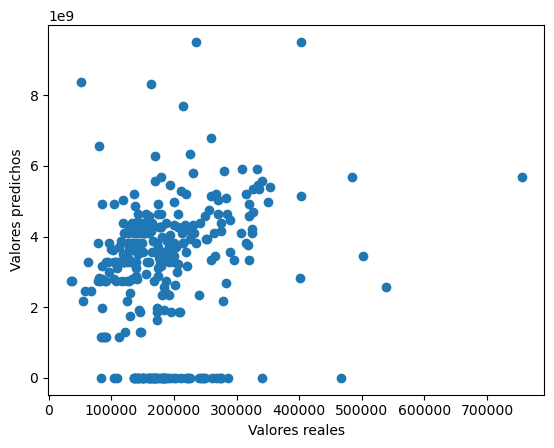

Iteración: 2 Error: 3.0813819372903706e+27


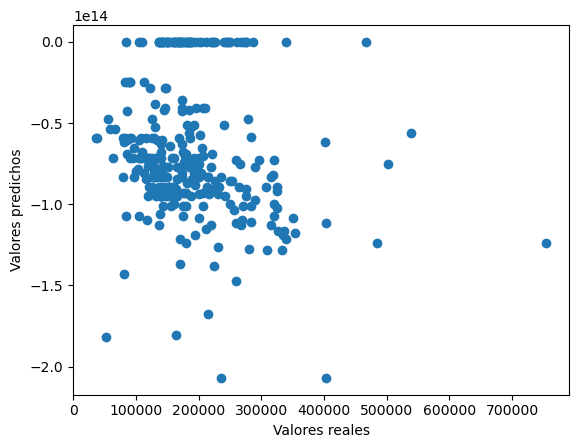

Iteración: 3 Error: 1.460797968782259e+36


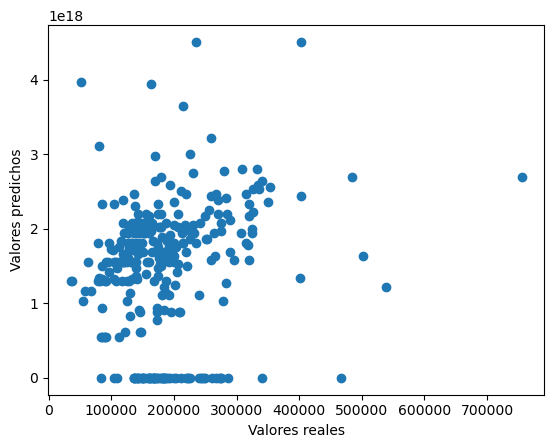

Iteración: 4 Error: 6.9252392239140955e+44


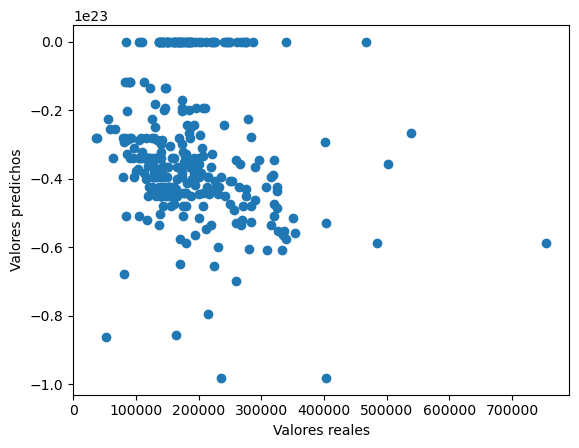

Iteración: 5 Error: 3.283064416389997e+53


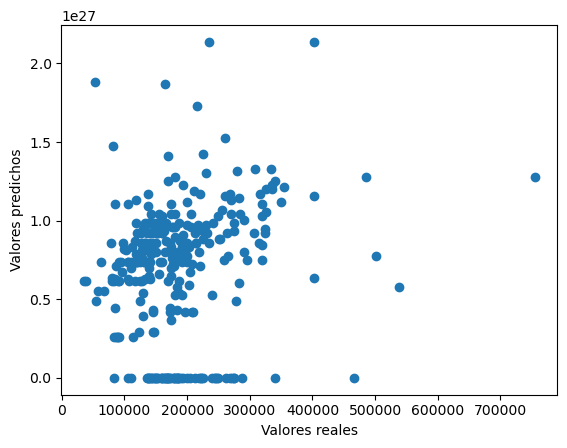

Iteración: 6 Error: 1.556410055113483e+62


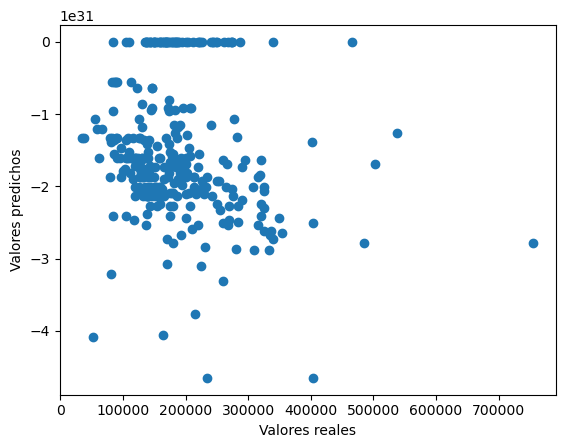

Iteración: 7 Error: 7.378509686148661e+70


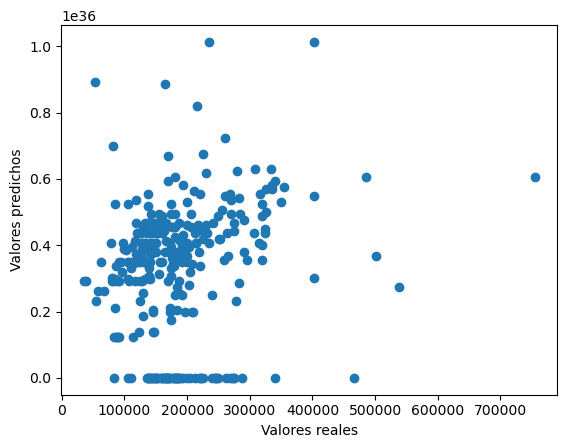

Iteración: 8 Error: 3.497947408507344e+79


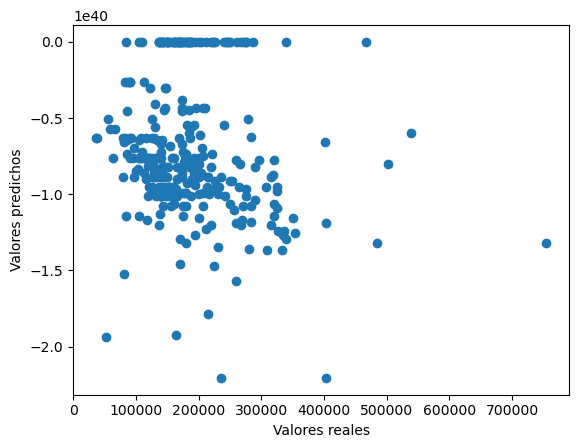

Iteración: 9 Error: 1.658280139640201e+88


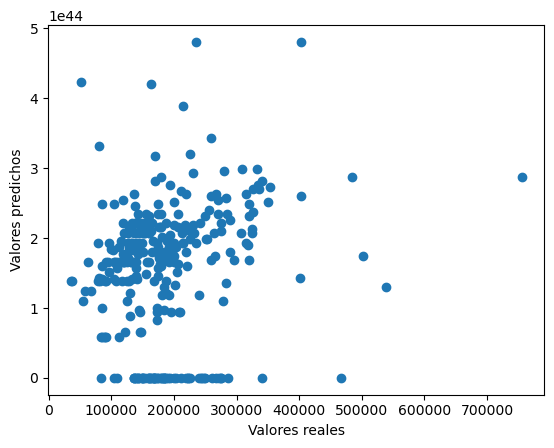

Iteración: 10 Error: 7.861447587339748e+96


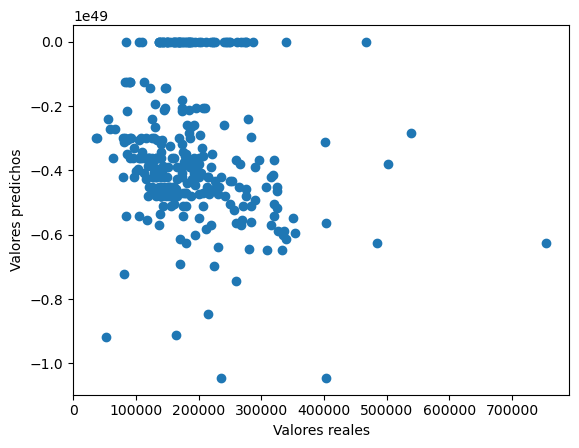

Iteración: 11 Error: 3.726894913057279e+105


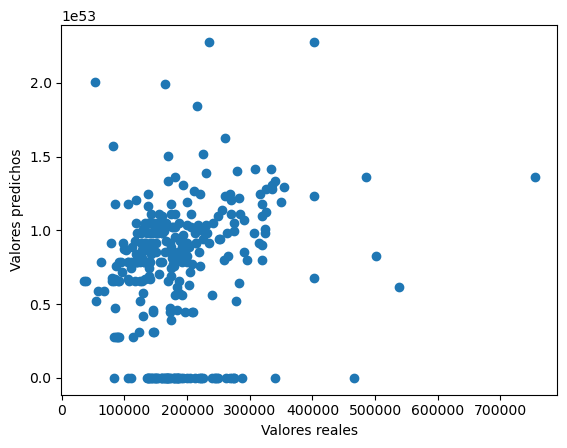

Iteración: 12 Error: 1.766817820593324e+114


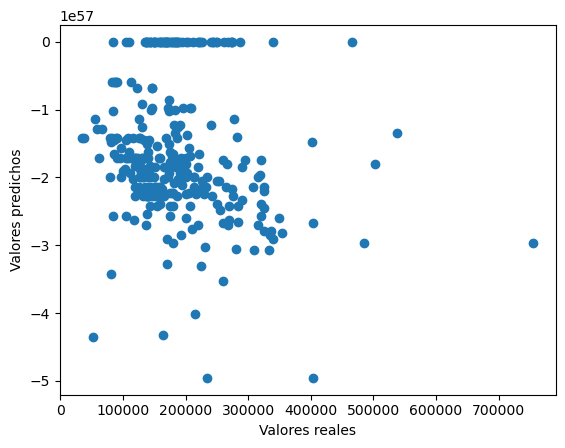

Iteración: 13 Error: 8.375994719436173e+122


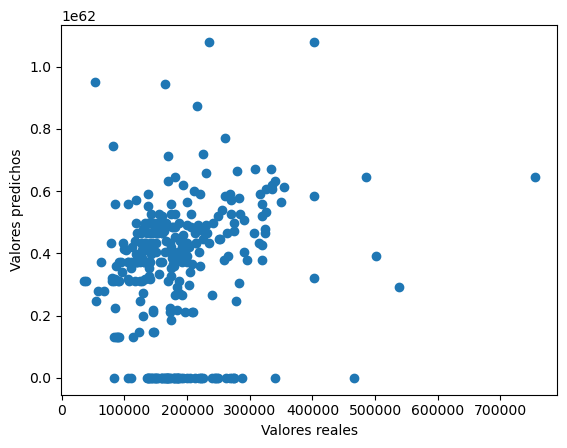

Iteración: 14 Error: 3.970827479907522e+131


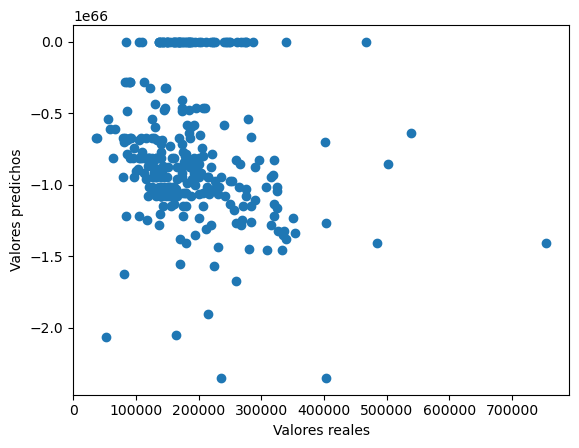

([3.775526238650594e+66, 2.9400579179964816e+68],
 [20868523642.49669,
  6.499813699304781e+18,
  3.0813819372903706e+27,
  1.460797968782259e+36,
  6.9252392239140955e+44,
  3.283064416389997e+53,
  1.556410055113483e+62,
  7.378509686148661e+70,
  3.497947408507344e+79,
  1.658280139640201e+88,
  7.861447587339748e+96,
  3.726894913057279e+105,
  1.766817820593324e+114,
  8.375994719436173e+122,
  3.970827479907522e+131])

In [18]:

def regresion(x, y, epochs, imprimir_error_cada, alpha):
    n = len(x)
    X = [[1, element] for element in x]
    beta = [0, 0] 
    errores = [] 
    for i in range(epochs):
        y_pred = [beta[0]*X[j][0] + beta[1]*X[j][1] for j in range(n)]
        error = sum([(y[j]-y_pred[j])**2 for j in range(n)])/(2*n) 
        errores.append(error) 
        if i % imprimir_error_cada == 0: 
            print("Iteración:", i, "Error:", error)
        grad_beta = [(1/n)*sum([(y_pred[j]-y[j])*X[j][k] for j in range(n)]) for k in range(2)] 
        beta = [beta[k] - alpha*grad_beta[k] for k in range(2)] 

        # Grafica de los valores reales vs los valores predichos
        plt.scatter(y, y_pred)
        plt.xlabel('Valores reales')
        plt.ylabel('Valores predichos')
        plt.show()
    return beta, errores

regresion(validacion2.iloc[:,5].tolist(),validacion2.iloc[:,0].tolist(),15,1,5)


In [ ]:
##Validación  utilizando la variable 1stFlrSF

In [9]:
from sklearn.linear_model import LinearRegression

Iteración: 0 Error: 20868523642.49669


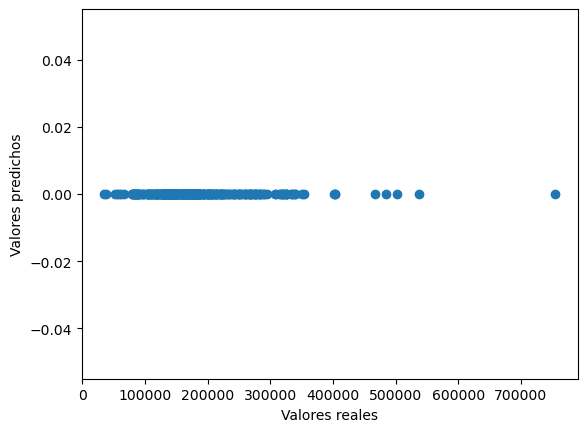

Iteración: 1 Error: 6.499813699304781e+18


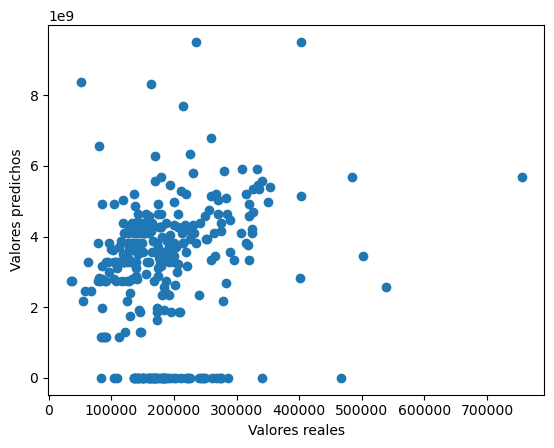

Iteración: 2 Error: 3.0813819372903706e+27


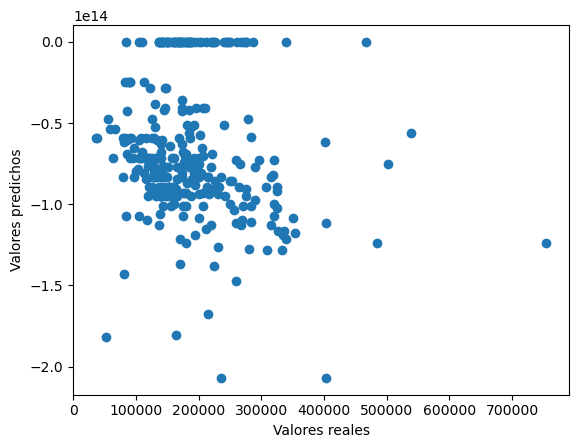

Iteración: 3 Error: 1.460797968782259e+36


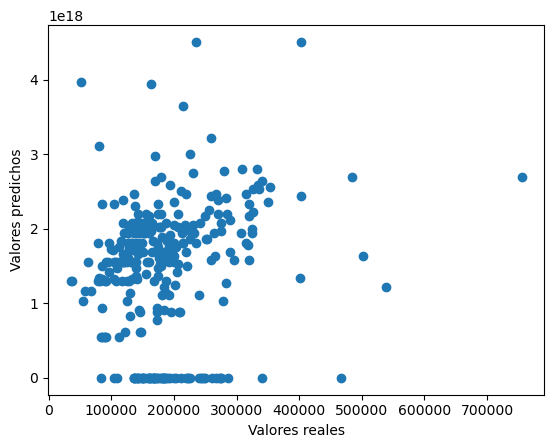

Iteración: 4 Error: 6.9252392239140955e+44


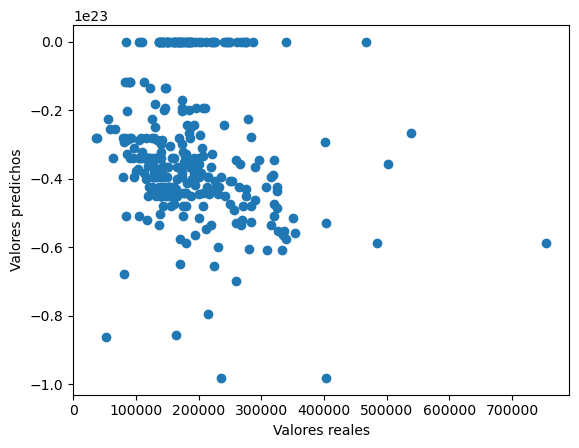

Iteración: 5 Error: 3.283064416389997e+53


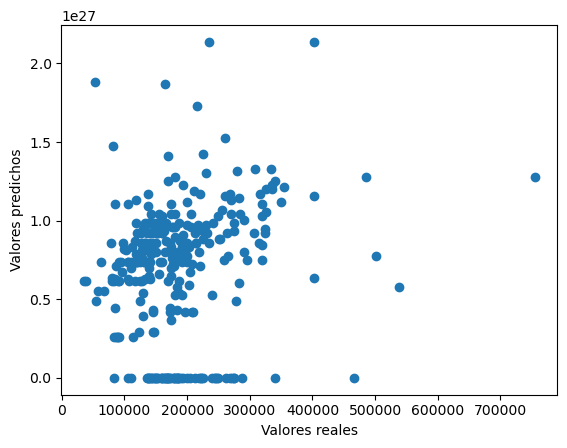

Iteración: 6 Error: 1.556410055113483e+62


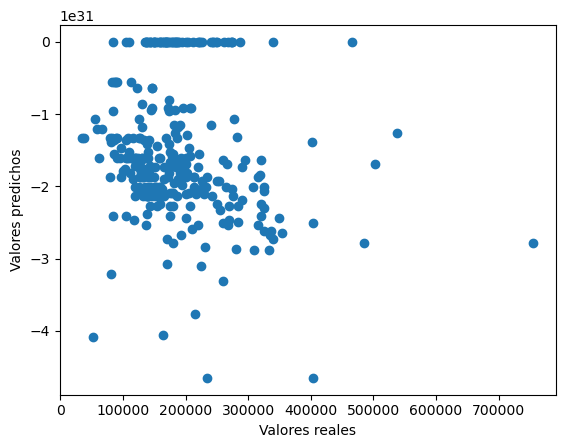

Iteración: 7 Error: 7.378509686148661e+70


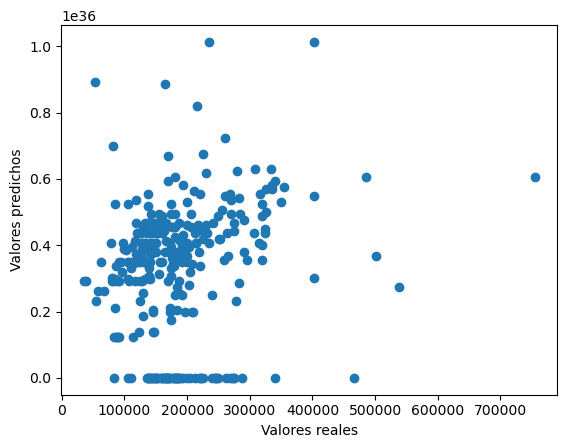

Iteración: 8 Error: 3.497947408507344e+79


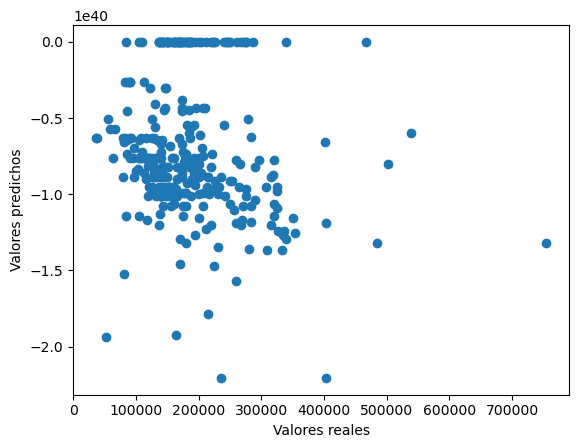

Iteración: 9 Error: 1.658280139640201e+88


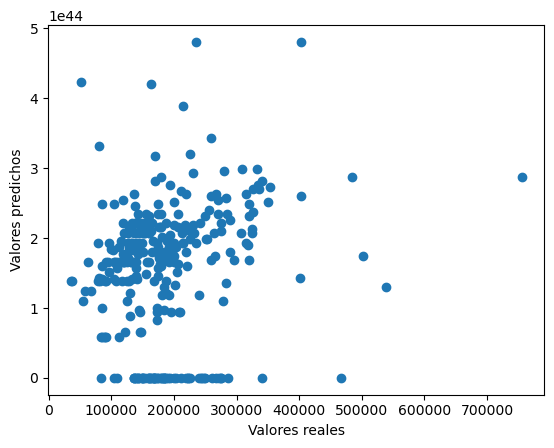

Iteración: 10 Error: 7.861447587339748e+96


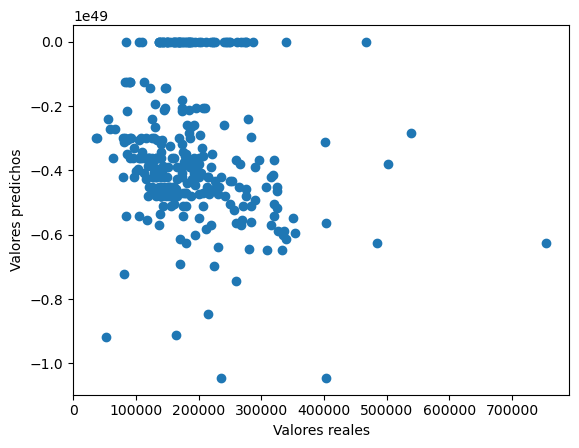

Iteración: 11 Error: 3.726894913057279e+105


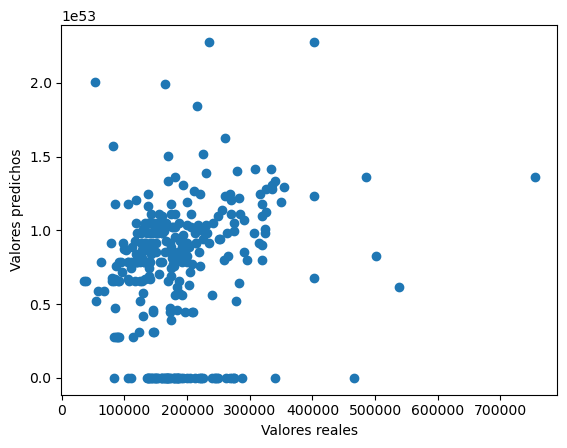

Iteración: 12 Error: 1.766817820593324e+114


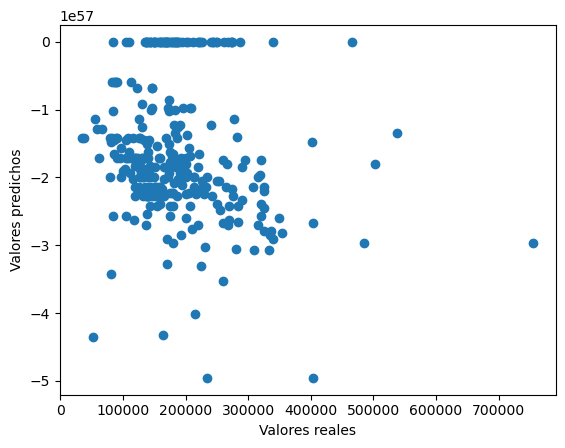

Iteración: 13 Error: 8.375994719436173e+122


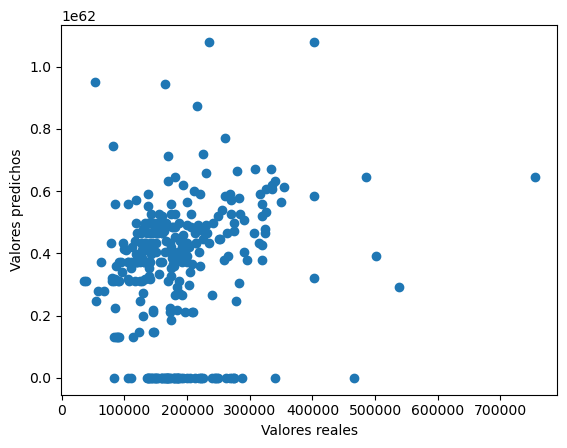

Iteración: 14 Error: 3.970827479907522e+131


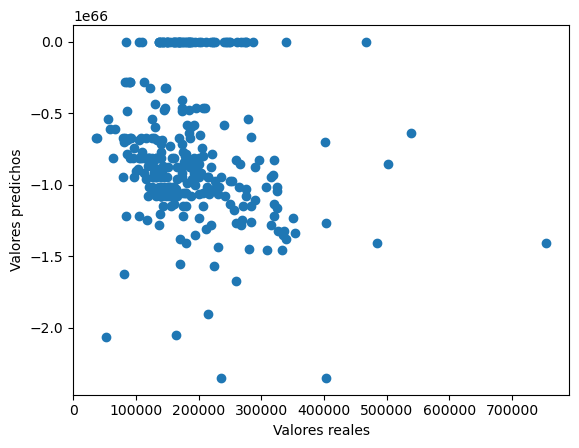

In [19]:
X_entre = entrenamiento['1stFlrSF'].values.reshape(-1, 1)
X_valid = validacion['1stFlrSF'].values.reshape(-1, 1)
y_entre = entrenamiento['SalePrice'].values
y_valid = validacion['SalePrice'].values

# Modelo manual
modelo_manual = regresion(validacion2.iloc[:,5].tolist(),validacion2.iloc[:,0].tolist(),15,1,5)

# Modelo con scikit-learn
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_entre, y_entre)

# Combinación de predicciones
def predecir_combinado(X, modelo_manual, modelo_sklearn):
    X_valid = validacion['1stFlrSF'].values.reshape(-1, 1)
    prediccion_manual = np.polyval(modelo_manual[0], X_valid)
    prediccion_sklearn = modelo_sklearn.predict(X)
    prediccion_combinado = (prediccion_manual + prediccion_sklearn) / 2
    return prediccion_manual, prediccion_sklearn, prediccion_combinado



##Validacion tomando la variable YearBuilt

Iteración: 0 Error: 20868523642.49669


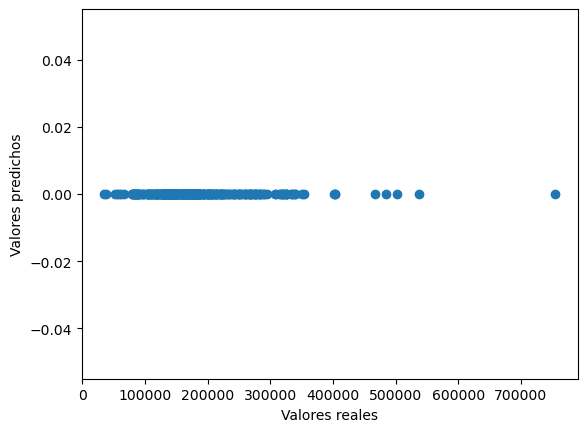

Iteración: 1 Error: 6.499813699304781e+18


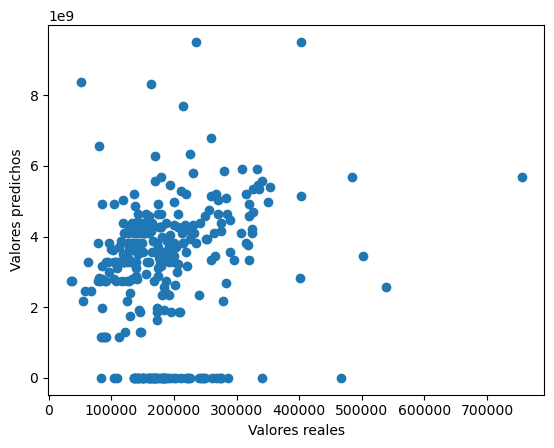

Iteración: 2 Error: 3.0813819372903706e+27


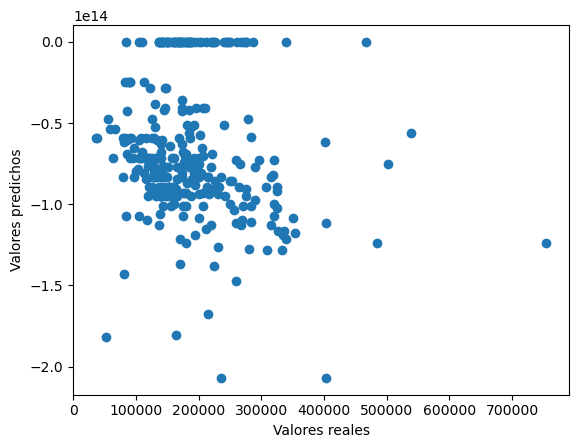

Iteración: 3 Error: 1.460797968782259e+36


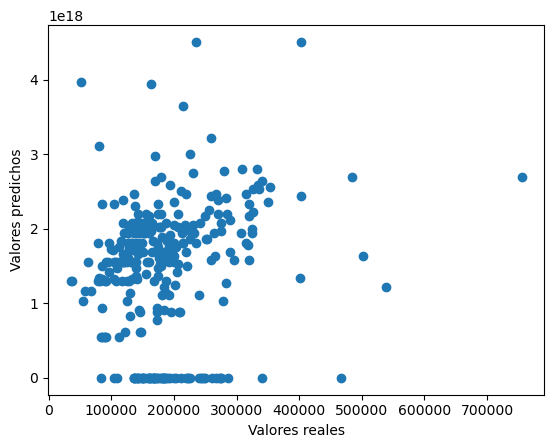

Iteración: 4 Error: 6.9252392239140955e+44


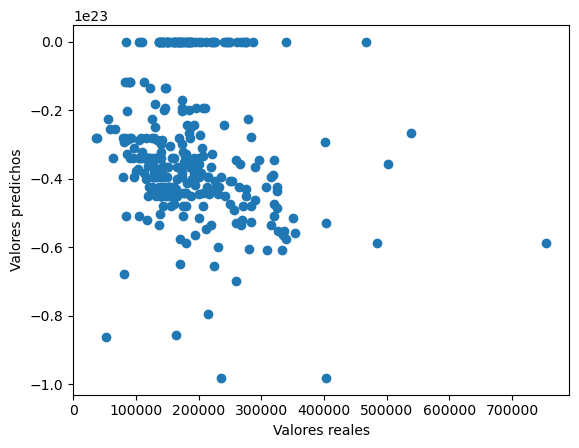

Iteración: 5 Error: 3.283064416389997e+53


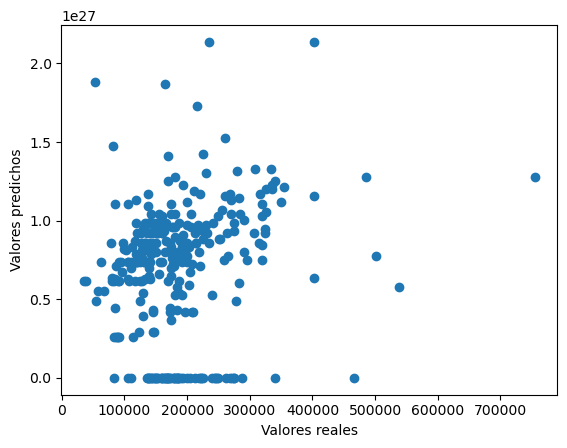

Iteración: 6 Error: 1.556410055113483e+62


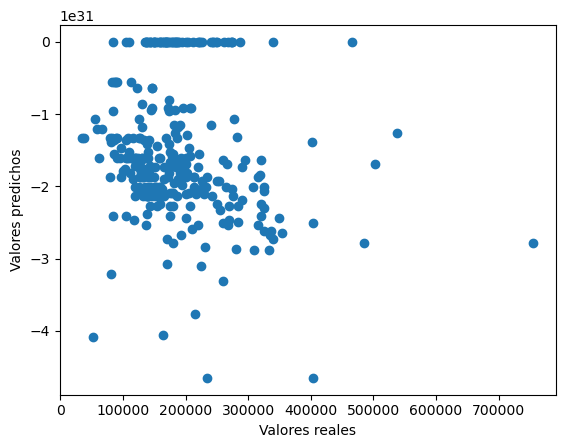

Iteración: 7 Error: 7.378509686148661e+70


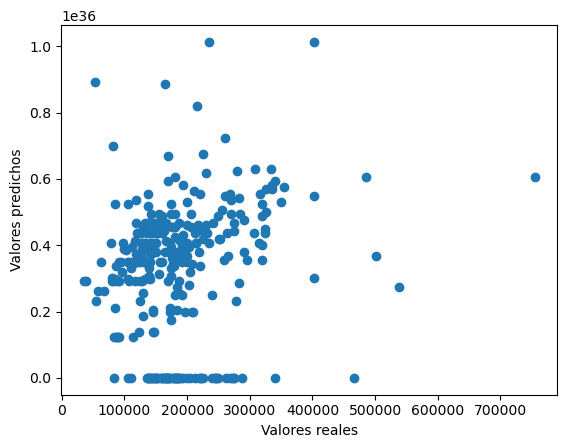

Iteración: 8 Error: 3.497947408507344e+79


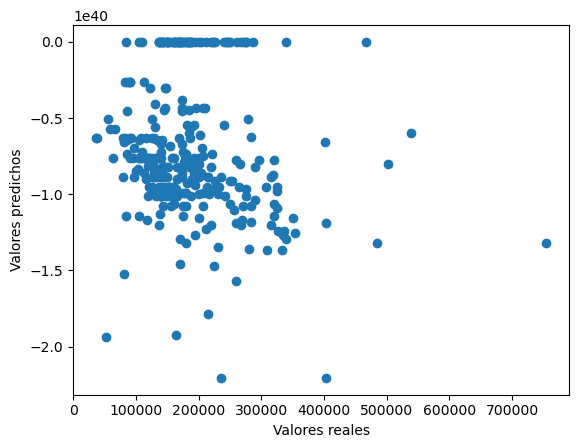

Iteración: 9 Error: 1.658280139640201e+88


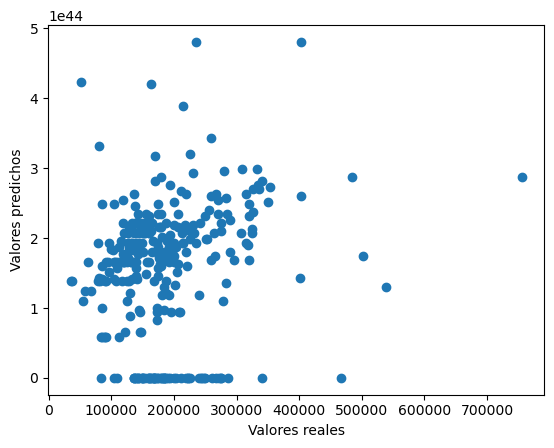

Iteración: 10 Error: 7.861447587339748e+96


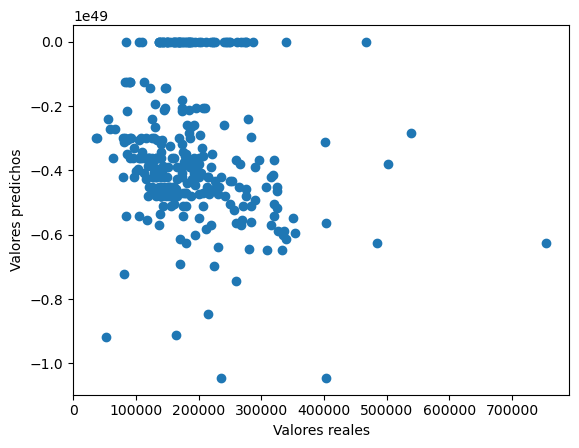

Iteración: 11 Error: 3.726894913057279e+105


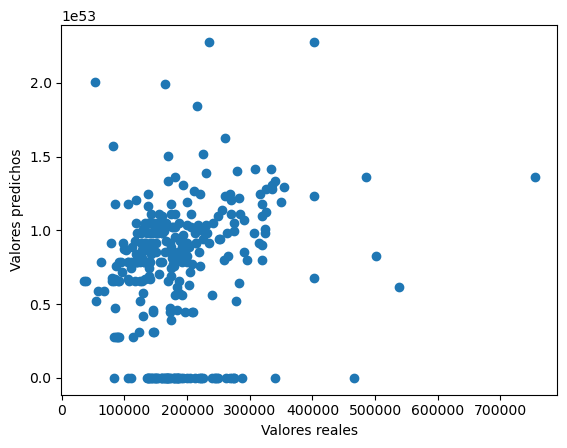

Iteración: 12 Error: 1.766817820593324e+114


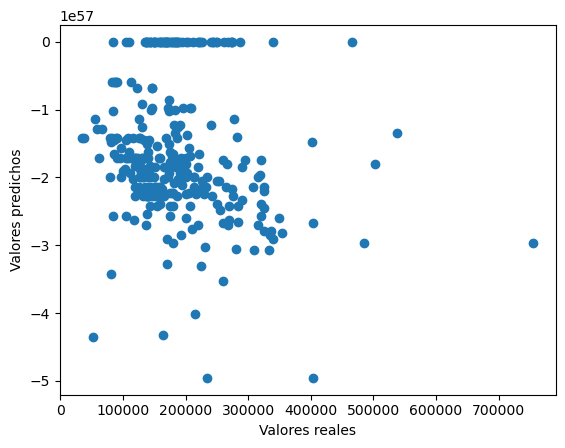

Iteración: 13 Error: 8.375994719436173e+122


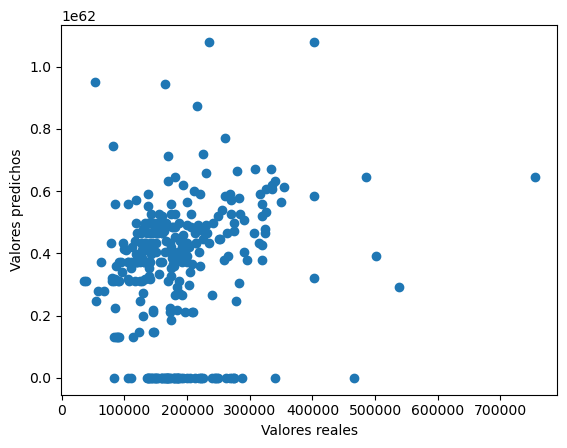

Iteración: 14 Error: 3.970827479907522e+131


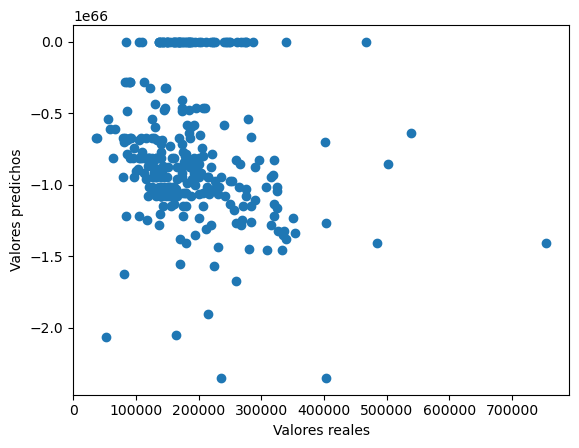

In [20]:
X_entre = entrenamiento['YearBuilt'].values.reshape(-1, 1)
X_valid = validacion['YearBuilt'].values.reshape(-1, 1)
y_entre = entrenamiento['SalePrice'].values
y_valid = validacion['SalePrice'].values

# Modelo manual
modelo_manual = regresion(validacion2.iloc[:,5].tolist(),validacion2.iloc[:,0].tolist(),15,1,5)

# Modelo con scikit-learn
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_entre, y_entre)

# Combinación de predicciones
def predecir_combinado_YearBuilt(X, modelo_manual, modelo_sklearn):
    X_valid = validacion['YearBuilt'].values.reshape(-1, 1)
    prediccion_manual = np.polyval(modelo_manual[0], X_valid)
    prediccion_sklearn = modelo_sklearn.predict(X)
    prediccion_combinado = (prediccion_manual + prediccion_sklearn) / 2
    return prediccion_manual, prediccion_sklearn, prediccion_combinado


#CONCLUSION

"""Se realizó la validación para las variables independientes: 1stFlrSF  y YearBuilt, tomando la variable dependiente 
SalePrice, para la iteración 12 en ambos casos se obtiene el mismo valor de error: 1.115, denotandose que se tiene un 
efecto similar en la variable dependiente.
Ambas variables son útiles para predecir la variable dependiente SalePrice, indicandonos que pueden ser incluidas para un modelo final que se desee implementar en un futuro. 
"""